# Preparing Time Series Data
Like most preparation processes, but now with dates!

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os
from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire
We'll start by loading up the data from mysql server.

In [ ]:
# The following are functions contained in the accompanying acquire.py file

# def get_db_url(database):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'

# def get_store_data():
#     '''
#     Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
#     '''
#     query = '''
#     SELECT *
#     FROM items
#     JOIN sales USING(item_id)
#     JOIN stores USING(store_id) 
#     '''
#     
#     df = pd.read_sql(query, get_db_url('tsa_item_demand'))
#     
#     df.to_csv('tsa_item_demand.csv', index=False)
#     
#     return df
# 
# def wrangle_store_data():
#     filename = 'tsa_store_data.csv'
#     
#     if os.path.isfile(filename):
#         df = pd.read_csv(filename)
#     else:
#         df = get_store_data()
#         
#     return df

In [2]:
df = wrangle_store_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


## Summarize
Before we dive into the data preparation, we should get an idea of the shape of the data. We'll get a sense for the number of rows, column names, datatypes, descriptive statistics, number and percent of missing values. We'll also get a broad overview of the kind of data in each column.

In [4]:
df.shape # number of rows and columns

(913000, 14)

In [5]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
df.tail()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
912995,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,912996,2017-12-27,63,8503 NW Military Hwy,78231,San Antonio,TX
912996,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,912997,2017-12-28,59,8503 NW Military Hwy,78231,San Antonio,TX
912997,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,912998,2017-12-29,74,8503 NW Military Hwy,78231,San Antonio,TX
912998,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,912999,2017-12-30,62,8503 NW Military Hwy,78231,San Antonio,TX
912999,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,913000,2017-12-31,82,8503 NW Military Hwy,78231,San Antonio,TX


In [7]:
df.isnull().sum() # number null values in each column

store_id         0
item_id          0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
sale_id          0
sale_date        0
sale_amount      0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [8]:
df.store_id.unique() # unique values of  store_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [10]:
df.sale_date.nunique() # number of unique sales dates

1826

In [11]:
df.sale_date.nunique() / 365

5.002739726027397

In [12]:
df.sale_date.min(), df.sale_date.max()

('2013-01-01', '2017-12-31')

In [13]:
df.sale_amount.describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sale_amount, dtype: float64

#### Takeaways so far:

- 913k rows
- No missing values
- `store_id` ranges from 1-10
- `item_id` ranges from 1-50
- 1826 unique days
- `sale_amount` ranges from 0-231
- `sale_date` is string and cannot be sorted appropriately

## Prepare
The most common activity in preparing time series data is setting dates to datetime types using `pd.to_datetime`.

Another common activity is looking at the frequency of the data and gaps in time or null values. As part of this, we'll investigate our data and figure out what each row represents and ask if that is what we want.

### Set Datetime Index

In [14]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

# Set the index as that date and then sort index (by the date)
df = df.set_index("sale_date").sort_index()

### Defining Our Observations
Here we ask ourselves what each row (or observation) represents or measures.

In [15]:
df.tail()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,28,719175900007,719175900007,Usda Produce,Guava,7.52,505802,59,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,913000,82,8503 NW Military Hwy,78231,San Antonio,TX


Notice that each row is not a single day. With datetime indices, we can have multiple rows at the same datetime value. It looks like each individual row, that is, each observation, is a sales of a specific item at a specific store, one sale.

We can confirm this by taking a look at the sale_id column.

In [16]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

It looks like each sale id does uniquely identify each row and each row is a combination of one item sold at one store. So each observation is the **quantity** of items sold on **one** day, in **one** store.

Column: store_id


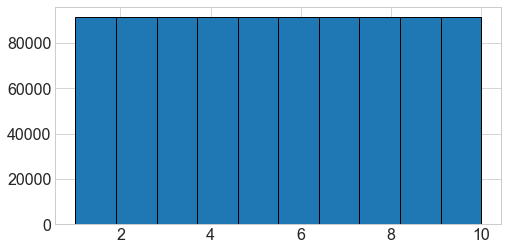

Column: item_id


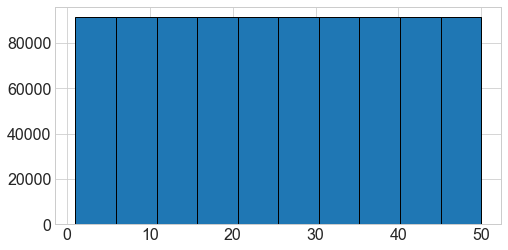

Column: item_upc14


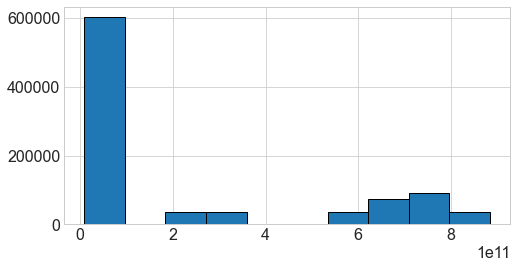

Column: item_upc12


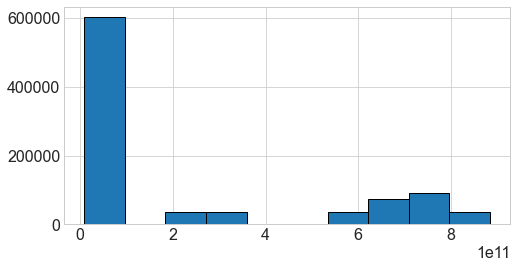

Column: item_brand


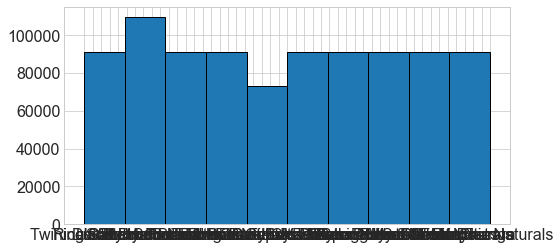

Column: item_name


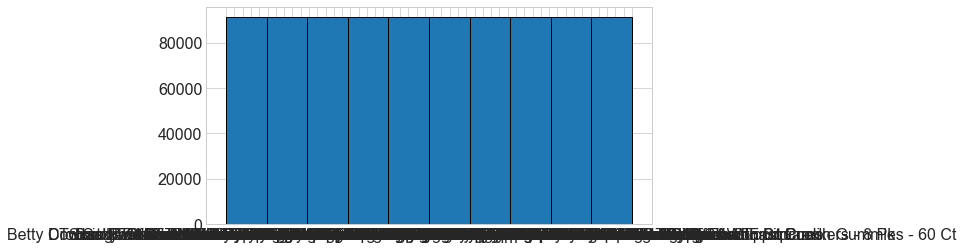

Column: item_price


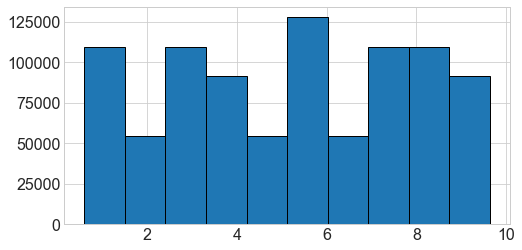

Column: sale_id


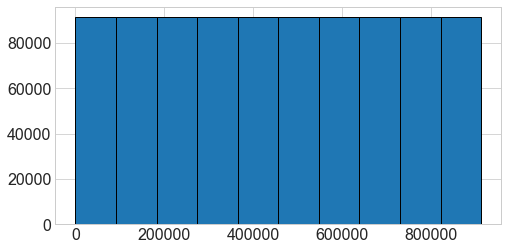

Column: sale_amount


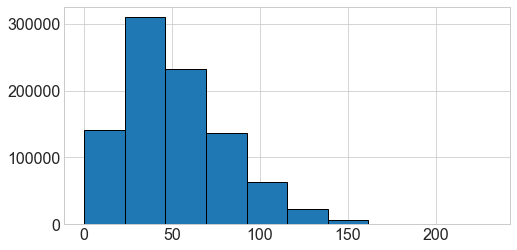

Column: store_address


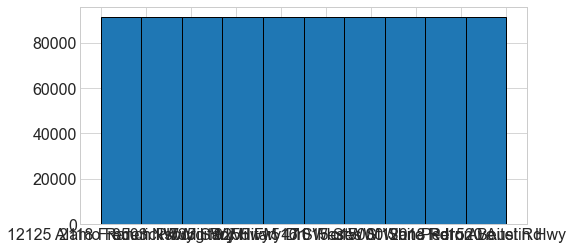

Column: store_zipcode


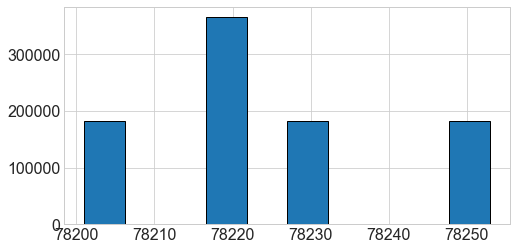

Column: store_city


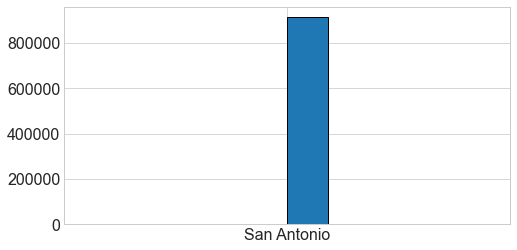

Column: store_state


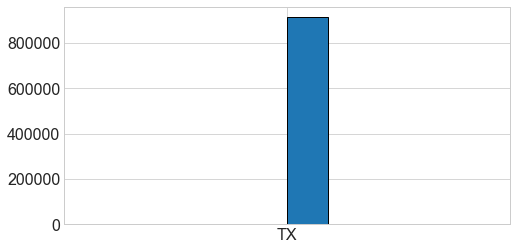

In [18]:
# Univariate analysis of variable distributions
for col in df.columns:
    print('Column: ' + col)
    plt.figure(figsize=(8,4))
    plt.hist(df[col], edgecolor='black')
    plt.show()

### Let's get to know our data a bit better
Currently, the dataframe has one row per sold item, but what if we need more or less granularity?

Let's get to know our data then consider what it means to define our observation in different ways.

We'll also look at different time-windows for our data.

### Plot Target Variable Over Time
Generate a quick plot of our target variable over time, the variable we wish to forecast or predict. We will first aggregate the `sale_amount` by `sale_date` using `sum()`, i.e. group by sale_date and sum the sale_amount. We will then do a quick plot of this aggregated data.

In [19]:
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.head()

,sale_date,sale_amount
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


<AxesSubplot:xlabel='sale_date'>

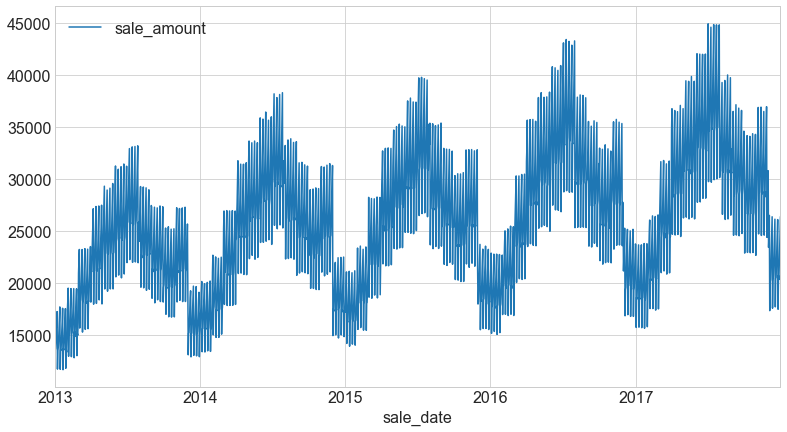

In [20]:
by_date.plot(x='sale_date', y='sale_amount')

Is each store equally represented in this dataset?

In [21]:
# Number of observations per store = number of item-transactions per store.
df.store_id.value_counts()

1     91300
3     91300
10    91300
9     91300
2     91300
4     91300
6     91300
8     91300
7     91300
5     91300
Name: store_id, dtype: int64

Is each item equally represented in this dataset?

In [22]:
df.item_id.value_counts().sort_index()

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item_id, dtype: int64

It looks like both items and stores are equally represented, that is, each store shows up the same number of times and so does each item.

### Explore Stores + Items
There are 50 different items and there were 18,260 sales for each item.

We will explore the data behind the unique combinations of store & item.
For example, what was the first sale date for each store/item combination? What was the last sale date?
On how many different days was each item sold at each store?

First, we will want to reset the index so that `sale_date` becomes a feature we can use in an aggregate.
Next, we will group by `store_id` and `item_id`. Finally, we will perform the aggregates needed to answer the questions.

Let's find the first sale date for each store/item combination:

In [24]:
first_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
first_sale.head(100)

store_id  item_id
1         1         2013-01-01
          2         2013-01-01
          3         2013-01-01
          4         2013-01-01
          5         2013-01-01
                       ...    
2         46        2013-01-01
          47        2013-01-01
          48        2013-01-01
          49        2013-01-01
          50        2013-01-01
Name: sale_date, Length: 100, dtype: datetime64[ns]

Is Jan 1, 2013 the first date for all store/item combinations?

In [25]:
# get the unique dates from first_sale_per_storeitem
first_sale.unique() # if there's only one unique value, then YES!

array(['2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

What is the last (i.e. most recent) sale date for each store/item combination?

In [26]:
last_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.max()
last_sale.head(50)

store_id  item_id
1         1         2017-12-31
          2         2017-12-31
          3         2017-12-31
          4         2017-12-31
          5         2017-12-31
          6         2017-12-31
          7         2017-12-31
          8         2017-12-31
          9         2017-12-31
          10        2017-12-31
          11        2017-12-31
          12        2017-12-31
          13        2017-12-31
          14        2017-12-31
          15        2017-12-31
          16        2017-12-31
          17        2017-12-31
          18        2017-12-31
          19        2017-12-31
          20        2017-12-31
          21        2017-12-31
          22        2017-12-31
          23        2017-12-31
          24        2017-12-31
          25        2017-12-31
          26        2017-12-31
          27        2017-12-31
          28        2017-12-31
          29        2017-12-31
          30        2017-12-31
          31        2017-12-31
          32        2

Is Dec 31, 2107 the last date for all store/item combinations?

In [27]:
last_sale.unique() # if there's only one unique value, then YES!

array(['2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

On how many different days was each item sold at each store?

In [28]:
days_per_store_per_item = df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()
days_per_store_per_item.head()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
Name: sale_date, dtype: int64

Did every store sell at least one of every item on every day in the data's time span?

In [29]:
# If there's only one unique value in the list, then YES!
days_per_store_per_item.unique() 

array([1826])

Every store sold every item on every one of the 1826 days in our data history.

## Check for time gaps in the data

While there might not be nulls present in our data, the time observations may leave a gap that we need to be able to detect. We can check the number of rows vs. the number of days that should exist between the minimum and maximum dates to see if there are any missing days.

In [32]:
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Number of rows: 1826
Number of days between first and last day: 1826 days 00:00:00


## Reproducibility
We'll now encapsulate all the preparation work that we've done into a single function, and store that function in prepare.py so that we can reference it again later.

In [33]:
def prep_store_data(df):
    # Reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date)

    # Sort rows by the date and then set the index as that date
    df = df.set_index("sale_date").sort_index()
    return df

## Data Splitting
Splitting time series data into train, test, and validate sets is a little trickier than with previous data we have looked at. Because the data points have an order to them, we cannot simply assign each point randomly to train, validate, or test.

Ideally all splits should contain one season's worth of data. There are several methods we can use to split our time series data:

**Human-based**: use, for example, the last year in the dataset as test split (i.e. use an arbitrary rule based on some convention)

**Percentage based**: use the last 20% as test

**Cross Validate**: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit)

### Percentage-Based Split

In [34]:
train_size = .70 #70% of the data
n = df.shape[0]
test_start_index = round(train_size * n)
train_size, n, test_start_index

(0.7, 913000, 639100)

In [35]:
train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [36]:
train

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02,10,31,652790100226,652790100226,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,565513,88,8503 NW Military Hwy,78231,San Antonio,TX
2016-07-02,4,3,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,43277,49,516 S Flores St,78204,San Antonio,TX
2016-07-02,9,11,657622604842,657622604842,Honest Tea,Honest Tea Peach White Tea,3.93,198487,109,735 SW Military Dr,78221,San Antonio,TX


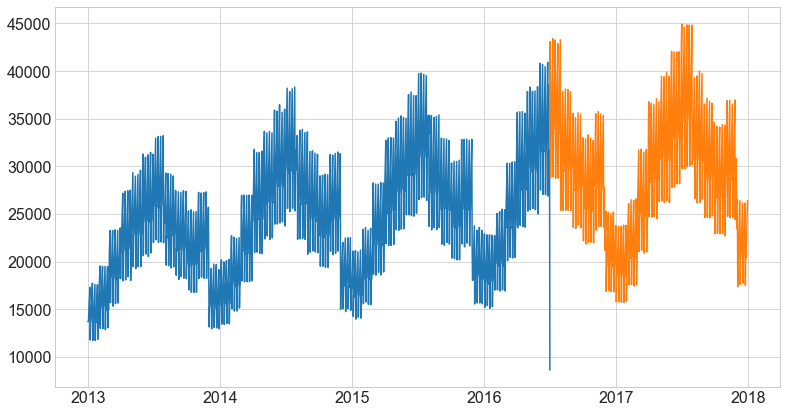

In [37]:
train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

Uh oh. It appears that my percentage-based splitting method is arbitrarily doing something weird to the data. Lets take a closer look:

In [38]:
train_by_date.tail()

,sale_date,sale_amount
1274,2016-06-28,31539
1275,2016-06-29,31638
1276,2016-06-30,33832
1277,2016-07-01,38583
1278,2016-07-02,8622


In [39]:
test_by_date.head()

,sale_date,sale_amount
0,2016-07-02,31912
1,2016-07-03,43103
2,2016-07-04,28792
3,2016-07-05,33392
4,2016-07-06,33287


In [40]:
train.tail(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2016-07-02,10,15,79400847201,79400847201,Suave,Suave Naturals Moisturizing Body Wash Creamy T...,9.11,273353,157,8503 NW Military Hwy,78231,San Antonio,TX


In [41]:
test.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2016-07-02,1,23,70670009658,70670009658,Reese,Reese Mandarin Oranges Segments In Light Syrup,1.78,402999,32,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


It appears that we are somewhat arbitrarily separating the train set from the test set in the middle of a single date. We can fix this by manually shifting the data over a tiny amount to round to the nearest date.

In [42]:
train = df[:'2016-07-01'] # everything up (not including) to the test_start_index
test = df['2016-07-02':] # everything from the test_start_index to the end

In [43]:
train.tail(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2016-07-01,2,37,73575295003,73575295003,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,660464,66,9255 FM 471 West,78251,San Antonio,TX


In [44]:
test.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2016-07-02,3,24,688267084225,688267084225,Smart Living,Smart Living Charcoal Lighter Fluid,5.34,424911,120,2118 Fredericksburg Rdj,78201,San Antonio,TX


Let's revisualize the split with the adjusted cutoff:

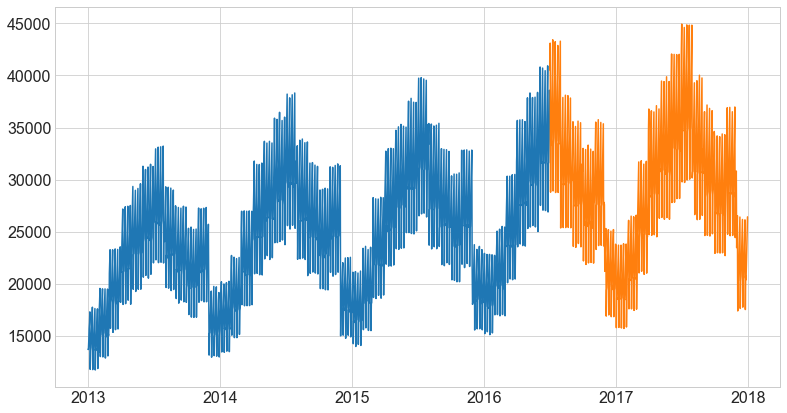

In [45]:
train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

## Human-Based Split

We can arbitrarily decide to split based on the last year:

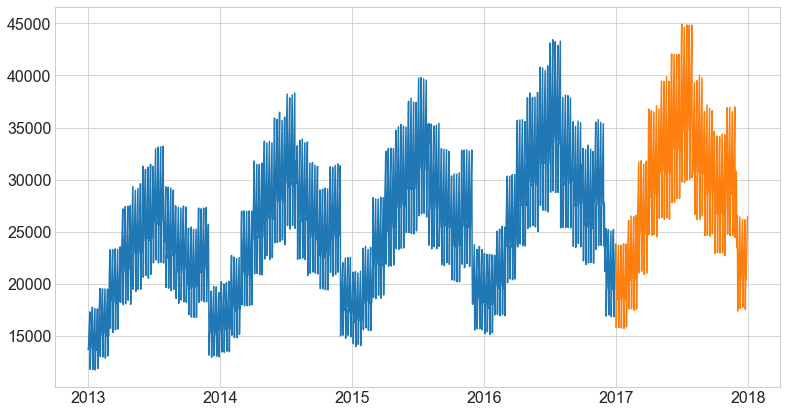

In [46]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

## Cross-Validated Splitting Using `sklearn`

In [47]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
tscv = TimeSeriesSplit(n_splits)

In [48]:
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [49]:
for train_index, test_index in tscv.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(f"Length of TRAIN: {len(train_index)}", f"Length of TEST: {len(test_index)}", "\n")

TRAIN: [     0      1      2 ... 152167 152168 152169] TEST: [152170 152171 152172 ... 304333 304334 304335]
Length of TRAIN: 152170 Length of TEST: 152166 

TRAIN: [     0      1      2 ... 304333 304334 304335] TEST: [304336 304337 304338 ... 456499 456500 456501]
Length of TRAIN: 304336 Length of TEST: 152166 

TRAIN: [     0      1      2 ... 456499 456500 456501] TEST: [456502 456503 456504 ... 608665 608666 608667]
Length of TRAIN: 456502 Length of TEST: 152166 

TRAIN: [     0      1      2 ... 608665 608666 608667] TEST: [608668 608669 608670 ... 760831 760832 760833]
Length of TRAIN: 608668 Length of TEST: 152166 

TRAIN: [     0      1      2 ... 760831 760832 760833] TEST: [760834 760835 760836 ... 912997 912998 912999]
Length of TRAIN: 760834 Length of TEST: 152166 



### Visualizing Cross-Validated Splits

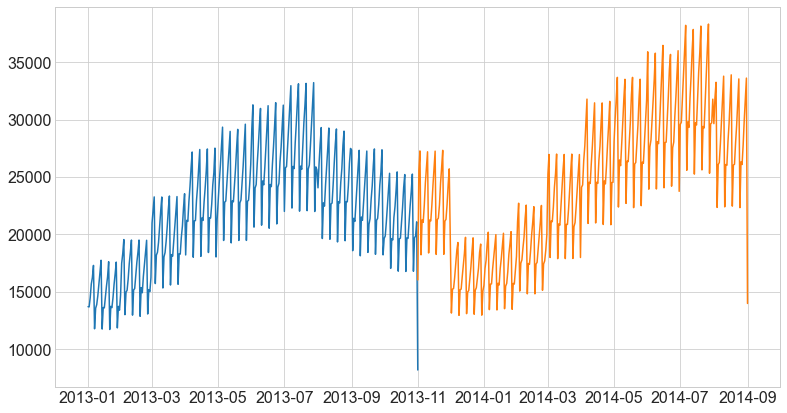

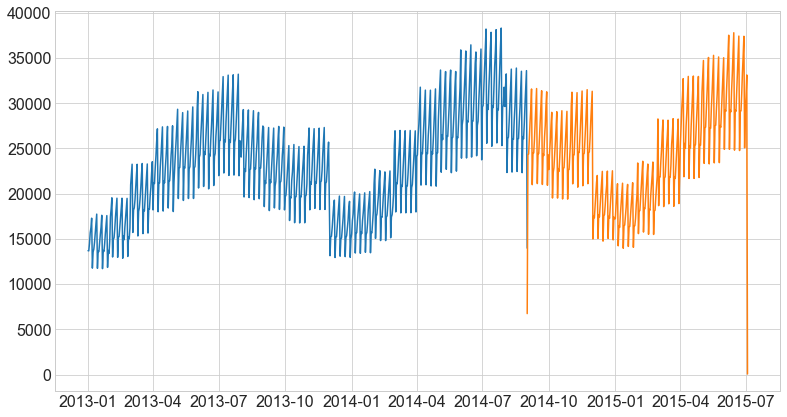

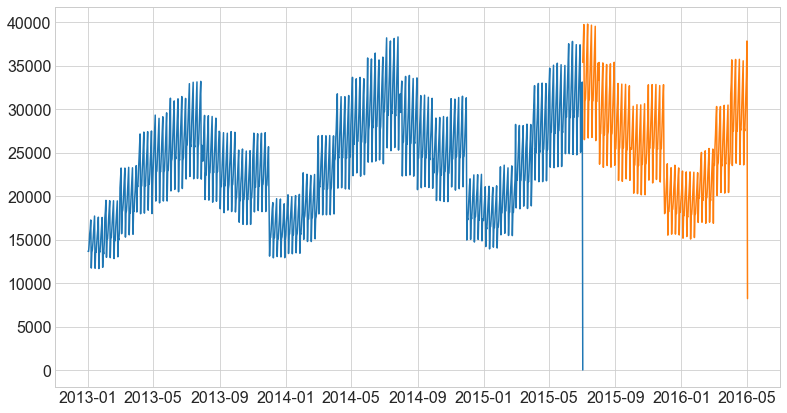

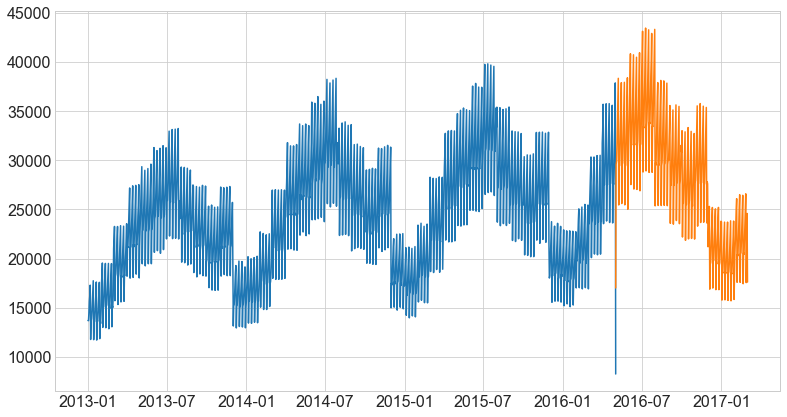

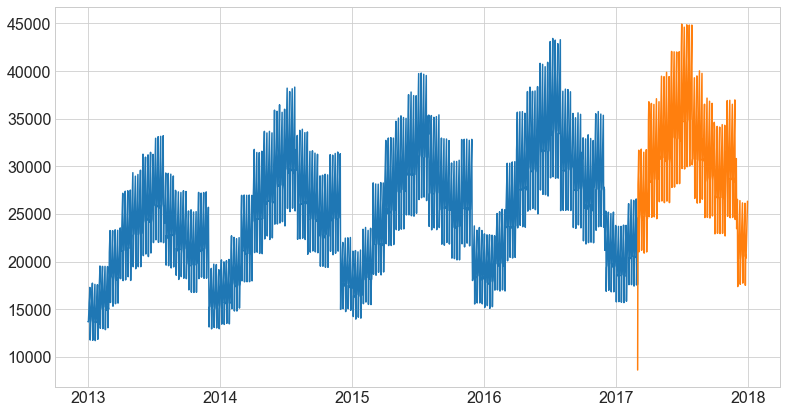

In [50]:
for train_index, test_index in tscv.split(df):
    train = df[:train_index[-1]]
    test = df[test_index[0]:test_index[-1]]

    train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
    #train_by_date.plot(x='sale_date', y='sale_amount')

    test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
    #test_by_date.plot(x='sale_date', y='sale_amount')

    plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
    plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
    plt.show()

Notice that we still have the same issue we ran into before. If we want to use this method and we don't want to split in the middle of a day, we will need to either algorithmically or manually tweak the split points.

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.